# Example: Regression using Quantum Reservoir Computing

In this exampe, we demonstrate how to use Quantum Reservoir Computing (QRC) for regression.
We will use the ``QRCRegressor`` implementation to build a QRC model and train it on a simple dataset.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from squlearn import Executor
from squlearn.qrc import QRCRegressor
from squlearn.encoding_circuit import HubregtsenEncodingCircuit

## Generate a simple univariate example dataset

First, we create a simple univariate dataset with the function $\exp(\sin(10x))$.

In [2]:
# Training data
X_train = np.arange(0.0, 1.0, 0.1)
y_train = np.exp(np.sin(10 * X_train))
X_train = X_train.reshape(-1, 1)

# Testing data
X_test = np.arange(0.01, 1.0, 0.01)
y_test = np.exp(np.sin(10 * X_test))
X_test = X_test.reshape(-1, 1)

## ``QRCRegressor`` Setup

We create a encoding circuit for the Quantum Reservoir, parameters in the encoding circuit are randomly initialized.
Furthermore, we initialize the squlearn Executor for the circuit evaluations. 
Finally, we create a ``QRCRegressor`` instance with the encoding circuit and the executor, utilizing
200 random measurements as the input of a linear model.

In [3]:
# Encoding circuit
pqc = HubregtsenEncodingCircuit(num_qubits=10, num_features=1, num_layers=2)
pqc.draw()

┌───┐┌──────────┐┌──────────┐                                       »
q_0: ┤ H ├┤ Rz(x[0]) ├┤ Ry(p[0]) ├──────■────────────────────────────────»
     ├───┤├──────────┤├──────────┤┌─────┴─────┐              ┌──────────┐»
q_1: ┤ H ├┤ Rz(x[0]) ├┤ Ry(p[1]) ├┤ Rz(p[10]) ├──────■───────┤ Rz(x[0]) ├»
     ├───┤├──────────┤├──────────┤└───────────┘┌─────┴─────┐ └──────────┘»
q_2: ┤ H ├┤ Rz(x[0]) ├┤ Ry(p[2]) ├─────────────┤ Rz(p[11]) ├──────■──────»
     ├───┤├──────────┤├──────────┤             └───────────┘┌─────┴─────┐»
q_3: ┤ H ├┤ Rz(x[0]) ├┤ Ry(p[3]) ├──────────────────────────┤ Rz(p[12]) ├»
     ├───┤├──────────┤├──────────┤                          └───────────┘»
q_4: ┤ H ├┤ Rz(x[0]) ├┤ Ry(p[4]) ├───────────────────────────────────────»
     ├───┤├──────────┤├──────────┤                                       »
q_5: ┤ H ├┤ Rz(x[0]) ├┤ Ry(p[5]) ├───────────────────────────────────────»
     ├───┤├──────────┤├──────────┤                                       »
q_6: ┤ H ├┤ Rz(x[0]) ├┤ Ry(p[6]) ├───────────────────────────────────────»
     ├───┤├──────────┤├──────────┤                                       »
q_7: ┤ H ├┤ Rz(x[0]) ├┤ Ry(p[7]) ├───────────────────────────────────────»
     ├───┤├──────────┤├──────────┤                                       »
q_8: ┤ H ├┤ Rz(x[0]) ├┤ Ry(p[8]) ├───────────────────────────────────────»
     ├───┤├──────────┤├──────────┤                                       »
q_9: ┤ H ├┤ Rz(x[0]) ├┤ Ry(p[9]) ├───────────────────────────────────────»
     └───┘└──────────┘└──────────┘                                       »
«                                                                      »
«q_0: ─────────────────────────────────────────────────────────────────»
«     ┌───────────┐                                                    »
«q_1: ┤ Ry(p[21]) ├────────────────────────────────────────────────────»
«     └┬──────────┤┌───────────┐                                       »
«q_2: ─┤ Rz(x[0]) ├┤ Ry(p[22]) ├───────────────────────────────────────»
«      └──────────┘└┬──────────┤┌───────────┐                          »
«q_3: ──────■───────┤ Rz(x[0]) ├┤ Ry(p[23]) ├──────────────────────────»
«     ┌─────┴─────┐ └──────────┘└┬──────────┤┌───────────┐             »
«q_4: ┤ Rz(p[13]) ├──────■───────┤ Rz(x[0]) ├┤ Ry(p[24]) ├─────────────»
«     └───────────┘┌─────┴─────┐ └──────────┘└┬──────────┤┌───────────┐»
«q_5: ─────────────┤ Rz(p[14]) ├──────■───────┤ Rz(x[0]) ├┤ Ry(p[25]) ├»
«                  └───────────┘┌─────┴─────┐ └──────────┘└┬──────────┤»
«q_6: ──────────────────────────┤ Rz(p[15]) ├──────■───────┤ Rz(x[0]) ├»
«                               └───────────┘┌─────┴─────┐ └──────────┘»
«q_7: ───────────────────────────────────────┤ Rz(p[16]) ├──────■──────»
«                                            └───────────┘┌─────┴─────┐»
«q_8: ────────────────────────────────────────────────────┤ Rz(p[17]) ├»
«                                                         └───────────┘»
«q_9: ─────────────────────────────────────────────────────────────────»
«                                                                      »
«                  ┌───────────┐ ┌──────────┐┌───────────┐             »
«q_0: ─────────────┤ Rz(p[19]) ├─┤ Rz(x[0]) ├┤ Ry(p[20]) ├──────■──────»
«                  └─────┬─────┘ └──────────┘└───────────┘┌─────┴─────┐»
«q_1: ───────────────────┼────────────────────────────────┤ Rz(p[30]) ├»
«                        │                                └───────────┘»
«q_2: ───────────────────┼─────────────────────────────────────────────»
«                        │                                             »
«q_3: ───────────────────┼─────────────────────────────────────────────»
«                        │                                             »
«q_4: ───────────────────┼─────────────────────────────────────────────»
«                        │                                             »
«q_5: ───────────────────┼─────────────────────────────────────────────»
«     ┌───────────┐  

In [4]:
# Executor
exec = Executor()

# Quantum Reservoir Computing model for regression
qrc = QRCRegressor(pqc, executor=exec, ml_model="linear", num_operators=200)

## Training

Next, we train the QRC model on the dataset using the ``fit`` method.

In [5]:
qrc.fit(X_train, y_train)

## Evaluate the model

We calculate the inference of the model on the training dataset.

In [6]:
y_pred = qrc.predict(X_test)

Plotting of the final results.

Mean Squared Error: 0.036204337784137064
R^2 Score: 0.9452016697468887


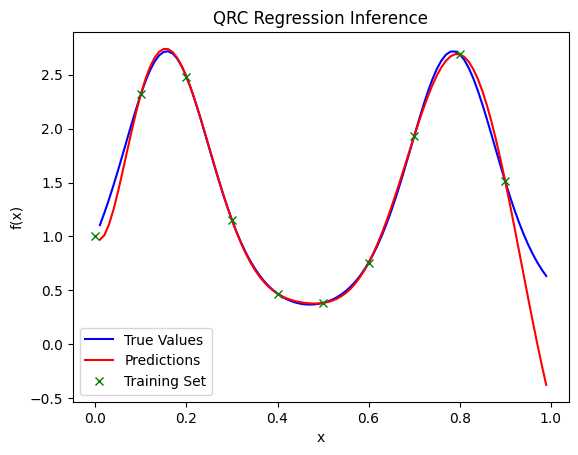

In [ ]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Plot the results
plt.plot(X_test, y_test, "-", color="blue", label="True Values")
plt.plot(X_test, y_pred, "-", color="red", label="Predictions")
plt.plot(X_train, y_train, "x", color="green", label="Training Set")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("QRC Regression Inference")
plt.legend()
plt.show()